In [150]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
def fun(x):
    f = 2*x+3*np.tan(x/4)-np.exp(x)
    return f  
def der(x):
    d = 2 + 3*(1/(4*((np.cos(x/4))**2)))- np.exp(x)
    return d
def der2(x):
    d = -np.exp(x)+(3/8)*np.tan(x/4)/(np.cos(x/4)**2)
    return d


In [151]:
def bisection(a,b,N):
    erN = abs(b-a)/2
    n=0
    root = 0.8335555793437379
  
    solution = []
    #we already know there is a root for f and so we don't need to check again
    while n< N:
        c=(a+b)/2
        n = n+1
        d = fun(c)
        solution.append(c)
        f1 = fun(a)
        f2= fun(b)
        f3 = fun(c)
        s1 = f1*f3
        s2 = f2*f3
        if s1<0:
            b = c
            erN = abs(b-a)/2
            
        if s2<0:
            a = c
            erN = abs(b-a)/2
            
    L = len(solution)
    root = solution[L-1]
    

    
    error_n = np.array([solution[L-1]-solution[0]])
    error_np1 = np.array([solution[L-1]-solution[1]])

    for i in range (1,L-1):
        error_n = np.append(error_n, [solution[L-1]-solution[i]])
        error_np1 = np.append(error_np1, [solution[L-1]-solution[i+1]])
        
    error_np1_predict=error_np1/2  
    
    fig, ax = plt.subplots()
    ax.plot(abs(error_n), abs(error_np1_predict))
    ax.plot(abs(error_n),abs(error_np1))
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set(xlabel='error_n', ylabel='error_n+1')
    plt.xlim(left=abs(error_n[-2]))
    ax.grid()
    plt.show()
    return error_n, error_np1, error_np1_predict
    
                      
   

In [172]:
def lin(a,b,N):
    n=0
    solution = []
    while n< N:
        n = n+1
        
        f1 = fun(a)
        f2= fun(b)
        c = b - (f2/(f2-f1))*(b-a)
        f3 = fun(c)
        solution.append(c)
        s1 = f1*f3
        s2 = f2*f3
        if s1<0:
            b = c
        if s2<0:
            a = c
    L = len(solution)
    root = solution[L-1]
    k = der2(root)/(2*der(root))
    
    error_n = np.array([solution[L-1]-solution[0]])
    error_np1 = np.array([solution[L-1]-solution[1]])

    for i in range (1,L-1):
        error_n = np.append(error_n, [solution[L-1]-solution[i]])
        error_np1 = np.append(error_np1, [solution[L-1]-solution[i+1]])
       
    with np.errstate(invalid='ignore'):
        error_np1_predict = k*(np.float_power(error_n,1.618))
    

    fig, ax = plt.subplots()
    ax.plot(abs(error_n), abs(error_np1_predict))
    ax.plot(abs(error_n),abs(error_np1))
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set(xlabel='error_n', ylabel='error_n+1')
    plt.xlim(left=abs(error_n[-2]))
    ax.grid()
    plt.show()
    return error_n, error_np1, error_np1_predict

In [173]:
def newtraph(xo,N):
    n = 0
    f = fun(xo)
    d = der(xo)
    solution = [xo]
    x = xo - (f/d)
    while n < N:
        solution.append(x)
        n = n+1
        f = fun(x)
        d = der(x)
        x = x - (f/d)
    #we know the number of iterations so let's calculate the error
    
   
    
    N = len(solution)
    root = solution[N-1]
    k = -der2(root)/(2*der(root))
    
    error_n = np.array([solution[N-1]-solution[1]])
    error_np1 = np.array([solution[N-1]-solution[2]])
    for i in range (2,N-1):
        
        error_n = np.append(error_n, [solution[N-1]-solution[i]])
        error_np1 = np.append(error_np1, [solution[N-1]-solution[i+1]])

    error_np1_predict = k*error_n**2

    NE = len(error_n)
    fig, ax = plt.subplots()
    ax.plot(error_n, error_np1_predict)
    ax.plot(error_n, error_np1)
    ax.set(xlabel='error_n', ylabel='error_n+1')
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.ylim(bottom=error_np1[NE-2])
    plt.xlim(left=error_np1[NE-3])
    ax.grid()
    plt.show()
    return error_n, error_np1, error_np1_predict

In [174]:
a = 0.5
b=1
xo = 0.5
N = 38
root = 0.8335555793434613

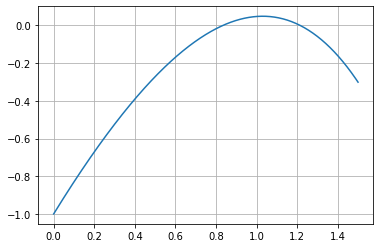

In [175]:
xpoints = np.linspace(0,1.5,500) 
fpoints = fun(xpoints)

plot1 = plt.plot(xpoints, fpoints)
plt.grid(True)
plt.show(plot1)

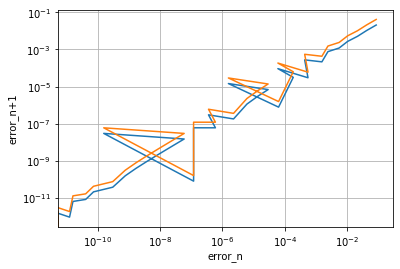

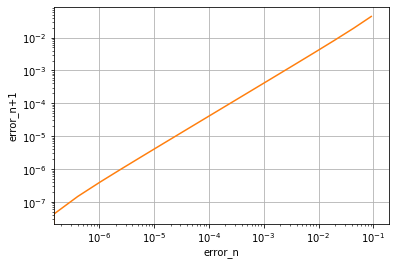

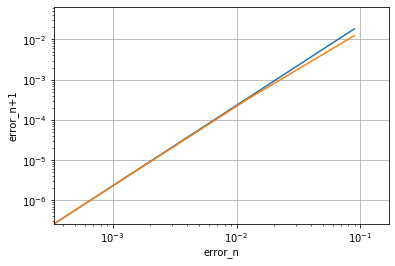

In [177]:
bisection(a,b,38)
lin(a,b,18) 
newtraph(xo,5) 


In [15]:
print("Alright. Let's put them together now")

Alright. Let's put them together now


In [48]:
def all (N):    
    a = 0.5
    b = 1
    erN = abs(b-a)/2
    n=0
    
    root = 0.8335555793437379
    x = []
    y2 = []
    EN = []
    #we already know there is a root for f and so we don't need to check again
    while n<N:
        c=(a+b)/2
        n = n+1
        d = fun(c)
        x.append(n)
        y2.append(abs(root-c))
        f1 = fun(a)
        f2= fun(b)
        f3 = fun(c)
        s1 = f1*f3
        s2 = f2*f3
        if s1<0:
            b = c
            erN = abs(b-a)/2
            EN.append(abs(root-((b+a)/2)))
        if s2<0:
            a = c
            erN = abs(b-a)/2
            EN.append(abs(root-((b+a)/2)))
    
    #now for the lin function
    root = 0.8335555793434613
    n=0
    a = 0.5
    b =1
    er=[]
    ns = []
    while n< N:
        n = n+1
        ns.append(n)
        f1 = fun(a)
        f2= fun(b)
        c = b - (f2/(f2-f1))*(b-a)
        f3 = fun(c)
        er.append(abs(root- c))
        s1 = f1*f3
        s2 = f2*f3
        if s1<0:
            b = c
        if s2<0:
            a = c
    
    #and lastly newtraph
    xo = 0.5
    n = 0
    f = fun(xo)
    d = der(xo)
    solution = [xo]
    x = xo - (f/d)
    while n < N:
        solution.append(x)
        n = n+1
        f = fun(x)
        d = der(x)
        x = x - (f/d)
    #we know the number of iterations so let's calculate the error
    err = []
    it = []
    for i in range (0,N):
        error = x - solution[i]
        it.append(i)
        err.append(error)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(it, err, it, er, it, y2, marker='o')
    ax.set_yscale('log')
    ax.set(xlabel='iteration', ylabel='error')
    ax.grid()
    plt.xlim(right=N-2)
    tick_spacing = 1
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing)) 

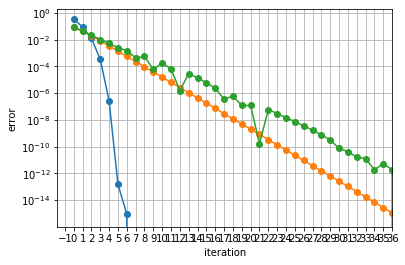

In [49]:
all(N)

In [238]:
def all2 (N):    
    a = 0.5
    b = 1
    erN = abs(b-a)/2
    n=0    
    
    solution = []
    #we already know there is a root for f and so we don't need to check again
    while n<N:
        c=(a+b)/2
        n = n+1
        d = fun(c)
        solution.append(c)
        f1 = fun(a)
        f2= fun(b)
        f3 = fun(c)
        s1 = f1*f3
        s2 = f2*f3
        if s1<0:
            b = c
            erN = abs(b-a)/2
            
        if s2<0:
            a = c
            erN = abs(b-a)/2
    L = len(solution)
    root = solution[L-1]
    

    
    b1 = np.array([solution[L-1]-solution[0]])
    b2 = np.array([solution[L-1]-solution[1]])

    for i in range (1,L-1):
        b1 = np.append(b1, [solution[L-1]-solution[i]])
        b2 = np.append(b2, [solution[L-1]-solution[i+1]])
            
    
    #now for the lin function
    root = 0.8335555793434613
    n=0
    a = 0.5
    b =1
    sol = []
    while n< N:
        n = n+1
        
        f1 = fun(a)
        f2= fun(b)
        c = b - (f2/(f2-f1))*(b-a)
        f3 = fun(c)
        sol.append(c)
        s1 = f1*f3
        s2 = f2*f3
        if s1<0:
            b = c
        if s2<0:
            a = c
    
    L = len(sol)
    root = sol[L-1]
    

    
    l1 = np.array([sol[L-1]-sol[0]])
    l2 = np.array([sol[L-1]-sol[1]])

    for i in range (1,L-1):
        l1 = np.append(l1, [sol[L-1]-sol[i]])
        l2 = np.append(l2, [sol[L-1]-sol[i+1]])
    
    #and lastly newtraph
    xo = 0.5
    n = 0
    f = fun(xo)
    d = der(xo)
    sn = [xo]
    x = xo - (f/d)
    while n < N:
        sn.append(x)
        n = n+1
        f = fun(x)
        d = der(x)
        x = x - (f/d)
    #we know the number of iterations so let's calculate the error
    sn.append(x)
    L = len(sn)
    root = sn[L-1]
    

    
    n1 = np.array([sn[L-1]-sn[0]])
    n2 = np.array([sn[L-1]-sn[1]])

    for i in range (1,L-1):
        n1 = np.append(n1, [sn[L-1]-sn[i]])
        n2 = np.append(n2, [sn[L-1]-sn[i+1]])
        
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(b1,b2, marker='o',color='pink')
    ax.plot(l1,l2,marker='o',color='green')
    ax.plot(n1,n2,marker='o', color='blue')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set(xlabel='error_n', ylabel='error_n+1')
    
    ax.grid()
    plt.show()

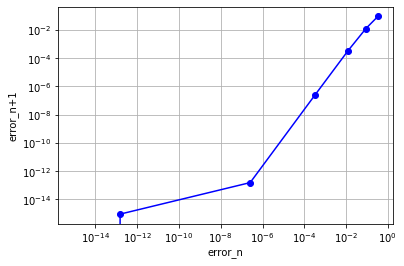

In [239]:
all2(8)

In [ ]:
#I don't understand where I went wrong. Truly. I'm gonna lose my mind in a bit